## Suicide Detection Classifier

In [105]:
import ctypes
import os.path
import pandas as pd
import re
import os
import string
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer



In [106]:
df = pd.read_csv('Suicide_Detection.csv')

df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [107]:
## dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [108]:
## checking for missing values
df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [109]:
# removing urls, emojis, html tags and punctuations.
## removing url from text
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


## removing html from text
def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

## removing punctuation from text
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
## removing emojis
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

# Applying the functions
df['clean_text'] = df['text'].apply(lambda x: remove_URL(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_html(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_punct(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_emojis(x))

In [110]:
## renaming the predictor name from class to label
df.rename(columns = {'class': 'label'}, inplace = True)

In [111]:
#specifying the relevant column
df = df[['label', 'clean_text']]

<AxesSubplot: xlabel='label', ylabel='Count'>

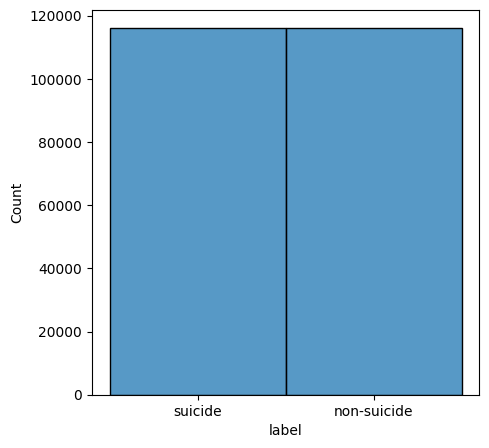

In [112]:
import seaborn as sns
df['label'].value_counts()

plt.figure(figsize=(5,5))
sns.histplot(data = df, x = 'label')

In [113]:


X = df['clean_text'].values
y = df['label'].values




In [114]:
## train test and split 
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=1000)

In [115]:
vectorizer = CountVectorizer(max_features=5000)

vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)



In [116]:

classifier = LogisticRegression()
classifier.fit(X_train, y_train)


c:\Users\Abayomi Bello\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
score = classifier.score(X_test, y_test)
print('Score-Logistic Regression', score)

Score-Logistic Regression 0.9259506625013465


In [118]:
import pickle
with open('logistic_re.pkl', 'wb') as file:
    pickle.dump((classifier, vectorizer), file)

In [163]:
## Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
import pickle

# Load the saved model
with open('logistic_re.pkl', 'rb') as file:
    classifier, vectorizer = pickle.load(file)

# Define a function to make predictions
user_input = input("Please enter the text: ")
    # Vectorize the input text
text_vectorized = vectorizer.transform([user_input])
    
    # Make the prediction using the trained model
prediction = classifier.predict(text_vectorized)
print(prediction)

# Print the prediction
if prediction == 'suicide':
    print("The model predicts that the user is at high risk of suicide.")
else:
    print("The model predicts that the user is not at high risk of suicide.")


['suicide']
The model predicts that the user is at high risk of suicide.


In [162]:
## Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
import pickle

# Load the saved model
with open('logistic_re.pkl', 'rb') as file:
    classifier, vectorizer = pickle.load(file)

# Define a function to make predictions
user_input = input("Please enter the text: ")
    
# Vectorize the input text
text_vectorized = vectorizer.transform([user_input])
    
# Make the prediction using the trained model
prediction_score = classifier.score(text_vectorized, ['suicide'])
print(prediction_score)
    
# Print the prediction
if prediction_score == 1:
    print("The model predicts that the user is at high risk of suicide.")
else:
    print("The model predicts that the user is not at high risk of suicide.")


1.0
The model predicts that the user is at high risk of suicide.
